# Algorytm sortowania bąbelkowego

**Algorytym sortowania bąbelkowego (ang. bubble sort algorithm)**
polega na porównywaniu par elementów leżących obok siebie i, jeśli jest to potrzebne, zmienianiu ich kolejności. Nazwa metody wzięła się stąd, że kolejne porównania powodują “wypychanie” kolejnego największego elementu na koniec.

### Przebieg sortowania

* Porównujemy pierwszy i drugi element tabeli i - jeśli trzeba - to zamieniamy je miejscami. Następnie podobnie porównujemy drugi i trzeci element i - jeśli to konieczne - zamieniamy je miejscami, itd.
* Powyższe operacje wykonujemy, aż dojdziemy do końca tabeli.
* Następnie ponownie rozpoczynamy porównywanie elementów od początku tabeli.
* Sortowanie kończymy, gdy podczas kolejnego przejścia przez całą tabelę nie wykonana zostanie żadna zamiana.

![](http://home.agh.edu.pl/~pkleczek/dokuwiki/lib/exe/fetch.php?w=951&h=702&tok=e8e20d&media=dydaktyka:aisd:2016:bubble_sort_example.png)

### Sortowanie bąbelkowe - pseudokod

```c
BUBBLE-SORT(n, T)
    for i := 1 to n
        do for j := n downto i + 1
            do if T[j] < T[j - 1]
                then swap T[j] and T[j-1]
```


### Złożoność czasowa

Algorytm wykonuje $n-1$ przejść, a w każdym przejściu wykonuje $n-k$ porównań (gdzie $k=1,2...n-1$ to numer przejścia), przez co jego teoretyczna złożoność czasowa wynosi $O(n^{2})$.

### Optymalizacja

Algorytm można rozbudować tak, by czas optymistyczny był lepszy, poprzez dodanie dodanie flagi informującej, czy w danej iteracji doszło do zmiany. Flaga jest zerowana na wejściu w przebiegu pętli, w przypadku natrafienia na zmianę jest podnoszona, a po wykonaniu przejścia sprawdzana. 

### Sortowanie bąbelkowe - python

Poniższy program przeprowadza sortowanie listy z losowo ustawionymi wartościami o podanym przez użytkownika rozmiarze.

In [1]:
#zaimportowanie bibliotek
import matplotlib.pyplot as plt                   #tworzenie wykresów
from matplotlib.animation import FuncAnimation    #animacja
from IPython.display import HTML                  #animacja jako HTML
import random                                     #generowanie liczb pseudolosowych

In [2]:
#funkcja pomocnicza do zamiany elementów i, j listy A
def swap(A, i, j):
    
    if i != j:
        A[i], A[j] = A[j], A[i]
        
#algorytm sortowania
def bubblesort(A):

    if len(A) == 1:
        return

    swapped = True
    for i in range(len(A) - 1):
        if not swapped:
            break
        swapped = False
        for j in range(len(A) - 1 - i):
            if A[j] > A[j + 1]:
                swap(A, j, j + 1)
                swapped = True
            yield A

In [3]:
#podaj liczbę elementów w tablicy
#stwórz listę pseudolosowych elementów 
N = int(input("Podaj liczbę elementów w tablicy:\n")) 
A = [i for i in range(1, N+1)] 
random.shuffle(A)

Podaj liczbę elementów w tablicy:
10


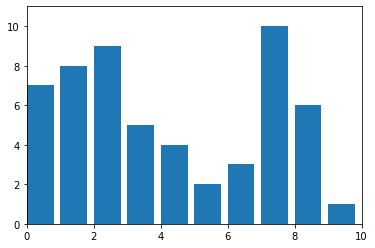

In [4]:
#obiekt generujący
generator = bubblesort(A)

#zainicjalizuj wykres i oś
fig, ax = plt.subplots() 

rects = ax.bar(range(len(A)), A, align="edge")

#ustaw limit widoku dla osi x i y
ax.set_xlim(0, len(A)) 
ax.set_ylim(0, int(1.1*len(A))) 

#ustaw tekst z liczbą operacji w odniesieniu do współrzędnych osi (do animacji)
text = ax.text(0.02, 0.95, "", transform=ax.transAxes)
iteration = [0]

In [5]:
#funkcja animacji
def animate(A, rects, iteration): 

    #ustala wielkość słupka adekwatną do wielkości elementu tablicy
    for rect, val in zip(rects, A): 
        rect.set_height(val)
        
    #iteracja po każdym dokonanym porównaniu
    #(liczba operacji)
    iteration[0] += 1
    text.set_text("Liczba operacji : {}".format(iteration[0]))


anim = FuncAnimation(fig, func=animate, 
                    fargs=(rects, iteration), frames=generator, interval=500, 
                    repeat=False)

### Animacja sortowania bąbelkowego

In [6]:
HTML(anim.to_html5_video())